## Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 

Our aim is to clean the dataset and analyze the data. Let us preview a few columns from our dataset which has 2 `csv` files, `dete_survey.csv` and `tafe_survey.csv`.

#####  `dete_survey.csv`
* `ID` - An id used to identify the participant of the survey
* `SeparationType` - The reason why the person's employment ended
* `Cease Date` - The year or month the person's employment ended
* `DETE Start Date` - The year the person began employment with the DETE

##### `tafe_survey.csv `

* `Record ID` - An id used to identify the participant of the survey
* `Reason for ceasing employment` - The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)` : The length of the person's employment (in years)



### Aim

Our goal is to clean the dataset and answer the following:

1. Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### 1. Open the Datasets into pandas

In [188]:
import numpy as np
import pandas as pd
import matplotlib.style as style
style.use('ggplot')

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey.info()
print("\n\n First 5 rows in DETE \n")
dete_survey[:5]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [189]:
tafe_survey.info()
print("\n\n First 5 rows in TAFE \n")
tafe_survey[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [190]:
dete_nulls = dete_survey.isnull().sum()
dete_nulls

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [191]:
tafe_nulls = tafe_survey.isnull().sum()
tafe_nulls

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

 From the above data, we can observe the following:
 
 * `DETE Start Date` and `Role Start Date` have invalid data `'Not Stated'` included which may denote that the values are missing.
 * There is quite a large number of null data in both `tafe_survey` and `dete_survey` dataframes.
 * Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
 
 

### 2. Identify missing values and drop unnecessary columns

As we observed earlier, the `dete_survey` has `Not Stated` values in `Start Date` and `Role Start Date` columns. Let us change those values and read them as `NaN`.

In [192]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey[:5]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, lets proceed to remove the columns from the dataframes that we won't be using in our analysis.

In [193]:
# Drop unwanted columns from dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print(dete_survey_updated.shape)
print(dete_survey.shape)


(822, 35)
(822, 56)


In [194]:
# Drop unwanted columns from tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(tafe_survey_updated.shape)
print(tafe_survey.shape)


(702, 23)
(702, 72)


We confirm that the columns have been dropped from both the dataframes, as seen in the results cells above.

### 3. Clean the Column Names (Standardizing Column Names)

We want to combine the dataframes into one and hence it is a best practise to standardize the column names and make it uniform across both the dataframes.

Let's start by renaming the columns in `dete_survey_updated` dataframe.

In [195]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()
dete_survey_updated[:0]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


Now, let's rename the column names in `tafe_survey` dataframe

In [196]:
columns_rename ={
    'Record ID':'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'    
}
tafe_survey_updated = tafe_survey_updated.rename(columns_rename, axis=1)
tafe_survey_updated[:0]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service


### 4. Filtering the data

We are going to clean the dataframe further and remove the unwanted data.

Let's have a close look at the `separationtype` column in both the dataframes

In [197]:
dete_survey_updated["separationtype"].head()

0               Ill Health Retirement
1    Voluntary Early Retirement (VER)
2    Voluntary Early Retirement (VER)
3           Resignation-Other reasons
4                      Age Retirement
Name: separationtype, dtype: object

In [198]:
tafe_survey_updated["separationtype"].head()

0    Contract Expired
1          Retirement
2          Retirement
3         Resignation
4         Resignation
Name: separationtype, dtype: object

We can notoce that though the data may imply the same meaning, the values are not different. For example, `Retirement` and `Resignation` in `tafe_survey` and the values in `dete_survey` are string like ` Resignation-Other reasons`, `Age Retirement` etc.

In this analysis, we are only concerned with the `Resignation` separation type. Let's proceed to clean and filter `separationtype` column.

In [199]:
# review the unique values
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [200]:
# review the unique values
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We have 3 resignation types in `dete_survey_updated` as seen from the above result cell.
1. `Resignation-Other reasons`
2. `Resignation-Other employer`
3. `Resignation-Move overseas/interstate`

From the values above, we only want to keep the data preceeding the `-` sign. 


In [201]:
dete_survey_updated['separationtype'] = dete_survey_updated["separationtype"].str.split('-').str[0]

In [202]:
# review the unique values
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [203]:
# copy results with separationtype = 'Resignation' to a new dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=='Resignation'].copy()

# confirm that the copy was successful
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


### 5. Verify data

In this step, let us verify and clean the years in `cease_year` and `dete_start_date`. First, let's view the unique values.

In [204]:
print("cease date in dete resignations \n", dete_resignations['cease_date'].value_counts())
print("dete start date in dete resignations \n",dete_resignations['dete_start_date'].value_counts())

cease date in dete resignations 
 2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64
dete start date in dete resignations 
 2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


There are month/year values in `cease_date` column and the values in `dete_start_date` are in float values. We will remove the inconsistencies and extract the year values and make both the columns to represent the same type of data(`float`).

In [205]:
# extract year from cease_date values in dete_resignations and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype("float")
print("uniques in cease date - dete resignations \n")
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

uniques in cease date - dete resignations 



2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [206]:
print("uniques in dete_start_date - dete resignations \n")
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

uniques in dete_start_date - dete resignations 



1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [207]:
print("uniques in cease_date - tafe resignations\n")
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True) 

uniques in cease_date - tafe resignations



2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Now we have the columns `cease_data` in both `tafe_resignation` and `dete_resignations` and `dete_start_date` in `dete_resignations` holding the consistent values

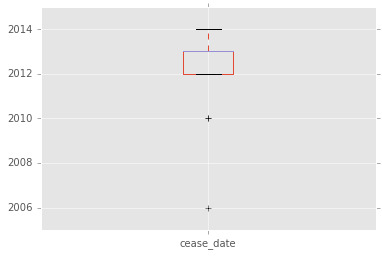

In [208]:
%matplotlib inline

dete_resignations["cease_date"].plot(kind="box", ylim=(2005,2015))

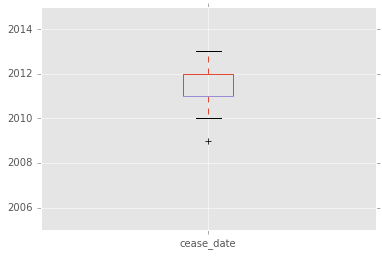

In [209]:
tafe_resignations["cease_date"].plot(kind="box", ylim=(2005,2015))

We can verify that there are no major issues with the years in the dataframes. If we recall our end goal of the analysis, we have to answer if the employees worked for short period of time due to any kind of dissatisfaction. Let's jump straight into analysing that.

We already renamed `service` column in `tafe_resignations` to `institute_service` but we do not have a cooresponding column in `dete_resignations`. Let's go ahead and create one.

In [210]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations[:5]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Next, we'll identify any employees who resigned because they were dissatisfied. We have `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns in `tafe_survey`. Let's explore more.

In [211]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())
print("\n",tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

 -                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We have 55 and 62 `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` respectively. Instead of these values, update the values to `True` , `False` or `NaN` values. We accomplish that with the help of the function `update_vals()` below.

In [212]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True
# update tafe_resignations
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
           'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["dissatisfied"].value_counts()



False    241
True      91
Name: dissatisfied, dtype: int64

In [213]:
# dete_resignations
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

### 6. Combine the datasets

First, let's add a column to each dataframe that will allow us to easily distinguish between the two and then combine the datasets.

In [214]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# combine the datasets
combined = pd.concat([dete_resignations_up,tafe_resignations_up])
# check the number of non null values  
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [215]:
# drop columns with less than 300 non null values
combined_updated = combined.dropna(thresh=300, axis =1).copy()
combined_updated[:5]

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,none_of_the_above,physical_work_environment,position,relocation,separationtype,study/travel,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher,False,Resignation,False,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Guidance Officer,False,Resignation,False,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher,False,Resignation,False,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher Aide,False,Resignation,False,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher,True,Resignation,False,False,False,False,False


### 7. Clean the `Service` column and perform initial analysis

Now that we've combined our dataframes,we'll have to clean up the `institute_service` column because it contains data in different forms.

In [216]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyse data, we convert these values into categories.

In [217]:
# extract service years and convert to float
combined_updated["institute_service_updated"] = combined_updated["institute_service"].astype('str').str.extract(r'(\d+)')
combined_updated["institute_service_updated"] = combined_updated["institute_service_updated"].astype('float')

#verify the changes and unique values
combined_updated["institute_service_updated"].value_counts(dropna=False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_updated, dtype: int64

We can see that there are `NaN` values in the column. Let's proceed further to clean the column further

In [218]:
def modify_definitions(val):
    if val >= 11:
        return "Veteran"
    elif (val >=7 and val <=10):
        return "Established"
    elif (val >=3 and val <=6):
        return "Experienced"
    elif (val <= 3):
        return "New"
    elif pd.isnull(val):
        return np.nan
combined_updated["service_cat"] = combined_updated["institute_service_updated"].apply(modify_definitions)
    

In [219]:
# verify the changes
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Now let's find the missing values in `dissatisfied` column and proceed with further analysis.

In [220]:
# check the unique values including missing values
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will replace the missing values in the `dissatisfied` column with the value that occurs most frequently in this column ie, **`False`**

In [221]:
# replace missing values with value 
# that occurs most frequently in this column
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64


#### Create a pivot table 
Next, let us create a pivot table to calculate the percentage of dissatisfied employees in each category

In [222]:
# create pivot table - dissatisfied by service_cat
ptable = combined_updated.pivot_table(index="service_cat", values="dissatisfied")
ptable = ptable.sort_values(by='dissatisfied',ascending=False)
ptable

,dissatisfied
service_cat,
Established,0.516129
Veteran,0.485294
Experienced,0.343023
New,0.295337


<a id="service_category"></a>

#### Plot the results

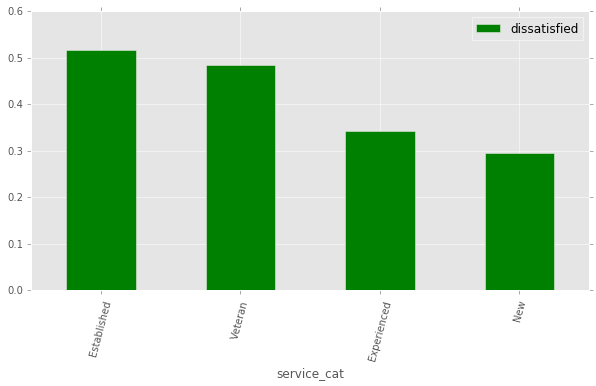

In [223]:
%matplotlib inline
ptable.plot(kind='bar', color="green", rot=75,figsize=(10,5))

We can observe that more people who left the job due to dissatisfaction are from the **Established** (51%) and **Veteran** (close to 49%) categories.

In other words, approx. 50% of the employees with  more than 7 years of experience and 29% of employees with less than 3 years of experience resigned due to some kind of dissatisfation.

Let's figure out employees under which of the given positions were most dissatisfied of all.

In [224]:
## create a pivot table which displays dissatisfation
#  by job position in the combined_updates
index_columns =['position']
ptable_position = combined_updated.pivot_table(index=index_columns, values="dissatisfied")
ptable_position = ptable_position.reindex(ptable_position['dissatisfied'].sort_values(ascending=False).index)
ptable_position

,dissatisfied
position,
Guidance Officer,1.000000
Other,0.666667
Public Servant,0.600000
Teacher,0.527132
Executive (SES/SO),0.500000
Head of Curriculum/Head of Special Education,0.500000
Cleaner,0.487179
Schools Officer,0.428571
Technical Officer (TO),0.400000


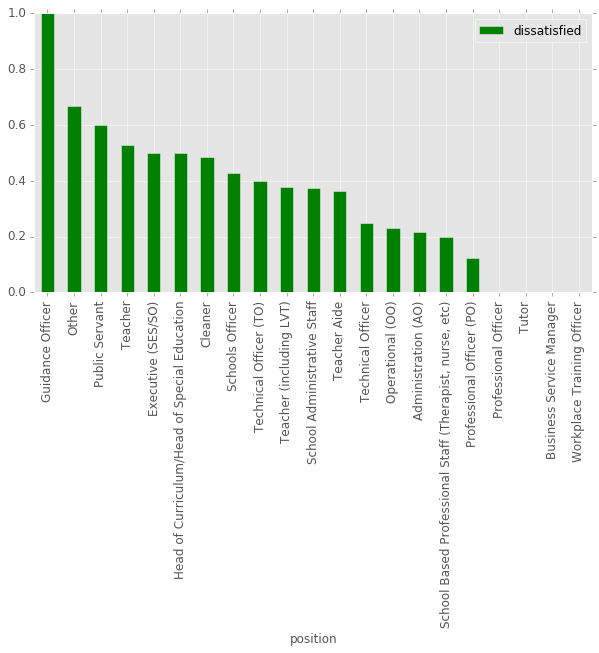

In [225]:
%matplotlib inline
ptable_position.plot(kind='bar',figsize=(10,5),fontsize=12, color='green')

From the above plot, we observe that employees who were **Guidance Officers** were the most dissatisfied with the job. **Business Service Managers**, **Tutors** and **Workplace Training Officers** showed no dissatisfaction, as per the data above.

### 8. Further Analysis 

#### 8.1 How many people in each career stage resigned due to some kind of dissatisfaction?

Let's clean and aggregate the rest of data to `service_cat` column to find out how many people resigned due in each stage of their career.

In [226]:
# let's have a look at all the column names again
print(combined_updated[:0])

Empty DataFrame
Columns: [Contributing Factors. Career Move - Private Sector , Contributing Factors. Career Move - Public Sector , Contributing Factors. Career Move - Self-employment, Contributing Factors. Dissatisfaction, Contributing Factors. Ill Health, Contributing Factors. Interpersonal Conflict, Contributing Factors. Job Dissatisfaction, Contributing Factors. Maternity/Family, Contributing Factors. NONE, Contributing Factors. Other, Contributing Factors. Study, Contributing Factors. Travel, Institute, WorkArea, age, career_move_to_private_sector, career_move_to_public_sector, cease_date, dissatisfaction_with_the_department, dissatisfied, employment_conditions, employment_status, gender, id, ill_health, institute, institute_service, interpersonal_conflicts, job_dissatisfaction, lack_of_job_security, lack_of_recognition, maternity/family, none_of_the_above, physical_work_environment, position, relocation, separationtype, study/travel, traumatic_incident, work_life_balance, work_loc

#### 8.1 Resignation due to some kind of dissatisfaction

Let's us analyse how many people in each career stage resigned due to some kind of dissatisfaction. Here, we are going to consider the dissatisfaction factors considered under DETE institute which are the following columns:
`job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition, lack_of_job_security,work_location,employment_conditions, work_life_balance,workload`

To proceed, firstly we find the missing values, clean them and then aggregate them with `service_cat` column.

Let's go ahead and clean the data in each column.



In [227]:
# check the missing values
print("Missing values in Job dissatisfaction\n",combined_updated["job_dissatisfaction"].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["job_dissatisfaction"]= combined_updated["job_dissatisfaction"].fillna(False)

combined_updated["job_dissatisfaction"].value_counts(dropna=False)



Missing values in Job dissatisfaction
 NaN      340
False    270
True      41
Name: job_dissatisfaction, dtype: int64


False    610
True      41
Name: job_dissatisfaction, dtype: int64

In [228]:
print(" \n\nMissing values in dissatisfaction_with_the_department\n",combined_updated["dissatisfaction_with_the_department"].value_counts(dropna=False))
combined_updated["dissatisfaction_with_the_department"]= combined_updated["dissatisfaction_with_the_department"].fillna(False)
combined_updated["dissatisfaction_with_the_department"].value_counts(dropna=False)



 

Missing values in dissatisfaction_with_the_department
 NaN      340
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


False    622
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [229]:
print(" \n\nMissing values in physical_work_environment\n",combined_updated["physical_work_environment"].value_counts(dropna=False))
combined_updated["physical_work_environment"]= combined_updated["physical_work_environment"].fillna(False)
combined_updated["physical_work_environment"].value_counts(dropna=False)



 

Missing values in physical_work_environment
 NaN      340
False    305
True       6
Name: physical_work_environment, dtype: int64


False    645
True       6
Name: physical_work_environment, dtype: int64

In [230]:
print(" \n\nMissing values in lack_of_recognition\n",combined_updated["lack_of_recognition"].value_counts(dropna=False))
combined_updated["lack_of_recognition"]= combined_updated["lack_of_recognition"].fillna(False)
combined_updated["lack_of_recognition"].value_counts(dropna=False)



 

Missing values in lack_of_recognition
 NaN      340
False    278
True      33
Name: lack_of_recognition, dtype: int64


False    618
True      33
Name: lack_of_recognition, dtype: int64

In [231]:
print(" \n\nMissing values in lack_of_job_security\n",combined_updated["lack_of_job_security"].value_counts(dropna=False))
combined_updated["lack_of_job_security"]= combined_updated["lack_of_job_security"].fillna(False)
combined_updated["lack_of_job_security"].value_counts(dropna=False)



 

Missing values in lack_of_job_security
 NaN      340
False    297
True      14
Name: lack_of_job_security, dtype: int64


False    637
True      14
Name: lack_of_job_security, dtype: int64

In [232]:
print(" \n\nMissing values in work_location\n",combined_updated["work_location"].value_counts(dropna=False))
combined_updated["work_location"]= combined_updated["work_location"].fillna(False)
combined_updated["work_location"].value_counts(dropna=False)



 

Missing values in work_location
 NaN      340
False    293
True      18
Name: work_location, dtype: int64


False    633
True      18
Name: work_location, dtype: int64

In [233]:
print(" \n\nMissing values in employment_conditions\n",combined_updated["employment_conditions"].value_counts(dropna=False))
combined_updated["employment_conditions"]= combined_updated["employment_conditions"].fillna(False)
combined_updated["employment_conditions"].value_counts(dropna=False)



 

Missing values in employment_conditions
 NaN      340
False    288
True      23
Name: employment_conditions, dtype: int64


False    628
True      23
Name: employment_conditions, dtype: int64

In [234]:
print(" \n\nMissing values in work_life_balance\n",combined_updated["work_life_balance"].value_counts(dropna=False))
combined_updated["work_life_balance"]= combined_updated["work_life_balance"].fillna(False)
combined_updated["work_life_balance"].value_counts(dropna=False)



 

Missing values in work_life_balance
 NaN      340
False    243
True      68
Name: work_life_balance, dtype: int64


False    583
True      68
Name: work_life_balance, dtype: int64

In [235]:
print(" \n\nMissing values in workload\n",combined_updated["workload"].value_counts(dropna=False))
combined_updated["workload"]= combined_updated["workload"].fillna(False)
combined_updated["workload"].value_counts(dropna=False)


 

Missing values in workload
 NaN      340
False    284
True      27
Name: workload, dtype: int64


False    624
True      27
Name: workload, dtype: int64

In [236]:
#  Contributing Factors. Job Dissatisfaction - TAFE
print(" \n\nMissing values in Contributing Factors. Job Dissatisfaction\n",combined_updated["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))
print(" \n\nMissing values in Contributing Factors. Dissatisfaction\n",combined_updated["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))

# update the missing values using the `update_vals()` we created earlier
combined_updated[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = (
combined_updated[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']]
    .applymap(update_vals))
combined_updated['Contributing Factors. Job Dissatisfaction']= combined_updated["Contributing Factors. Job Dissatisfaction"].fillna(False)
 
combined_updated['Contributing Factors. Dissatisfaction']= combined_updated["Contributing Factors. Dissatisfaction"].fillna(False)
 
# check the values
print('\n\n Cleaned column Contributing Factors. Job Dissatisfaction \n')
print(combined_updated['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))
print('\n\n Cleaned column Contributing Factors. Dissatisfaction \n')
print(combined_updated['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

 

Missing values in Contributing Factors. Job Dissatisfaction
 NaN                    319
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
 

Missing values in Contributing Factors. Dissatisfaction
 NaN                                       319
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


 Cleaned column Contributing Factors. Job Dissatisfaction 

False    589
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


 Cleaned column Contributing Factors. Dissatisfaction 

False    596
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


Columns `Contributing Factors. Job Dissatisfaction` and `job_dissatisfaction` represent job dissatisfaction in TAFE and DETE institutes respectively. We can combine both to on single column and proceed with our analysis.

In [237]:
# 
combined_updated["DETE-TAFE Combined job_dissatisfaction"] = combined_updated[['job_dissatisfaction',
        'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
 
combined_updated["DETE-TAFE Combined job_dissatisfaction"].value_counts()

False    548
True     103
Name: DETE-TAFE Combined job_dissatisfaction, dtype: int64


Now that we have cleaned the missing values, let's aggregate by `service_cat` and analyse the results.

In [238]:
cols=[ 'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload','DETE-TAFE Combined job_dissatisfaction','Contributing Factors. Dissatisfaction']

dissatisfaction_result = combined_updated.pivot_table(index='service_cat', values=cols)
# dissatisfaction_result = dissatisfaction_result.sort_values(by=cols,ascending=False)

dissatisfaction_result

,Contributing Factors. Dissatisfaction,DETE-TAFE Combined job_dissatisfaction,dissatisfaction_with_the_department,employment_conditions,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
service_cat,,,,,,,,,,
Established,0.048387,0.225806,0.096774,0.064516,0.016129,0.112903,0.016129,0.161290,0.112903,0.064516
Experienced,0.087209,0.151163,0.040698,0.034884,0.017442,0.052326,0.017442,0.081395,0.029070,0.034884
New,0.082902,0.160622,0.005181,0.010363,0.010363,0.010363,0.005181,0.072539,0.005181,0.015544
Veteran,0.066176,0.161765,0.102941,0.051471,0.051471,0.073529,0.007353,0.183824,0.029412,0.080882


<a id="all_factors"></a>
#### Plot the chart

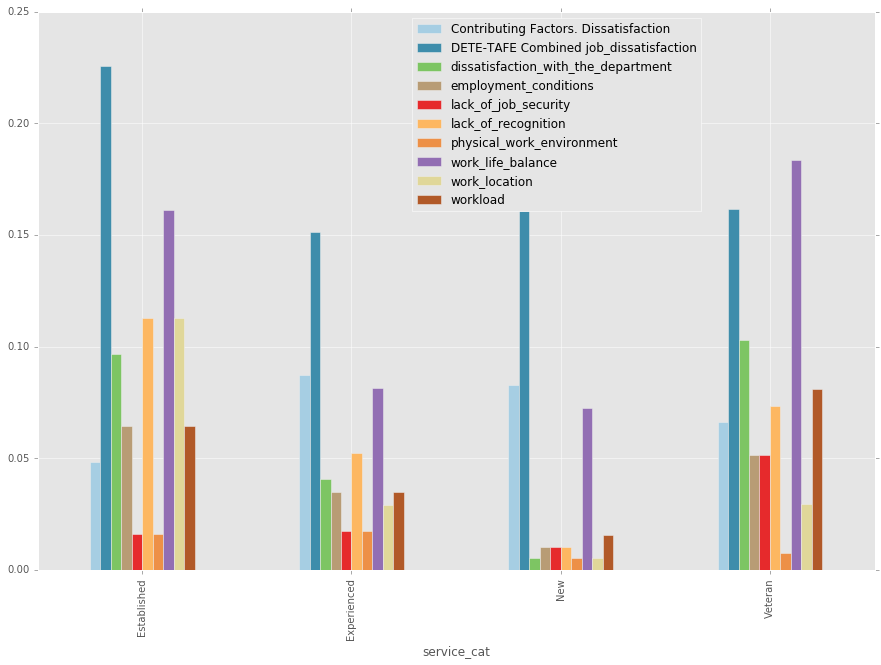

In [239]:
dissatisfaction_result.plot(kind='bar', figsize=(15,10),colormap='Paired').legend(bbox_to_anchor=(0.8, 1))

The chart above shows the results of aggregation of dissatisfaction factors among the employees in DETE and TAFE institutes by service category.

From the plot, we can say that lack of ***work-life balance*** is one of the major reasons for dissatisfaction with the job that  18% of ***Established*** employees in DETE resigned followed by 13% of the ***New*** employees were dissatisfied with their job as represented by the ***Contributing Factors. Job Dissatisfaction*** factor.

In general by looking at the chart, it is clear that the more ***Established*** employees resigned due to some kind of dissatisfaction and this supports previous analysis [here](#service_category).


#### 8.2 Employee dissatisfaction by institute

In [240]:
# check the values
combined_updated["institute"].value_counts(dropna=False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [241]:
# create pivot table - dissatisfaction by institute
ptable_institute= combined_updated.pivot_table(index=['institute'], values="dissatisfied")
ptable_institute

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


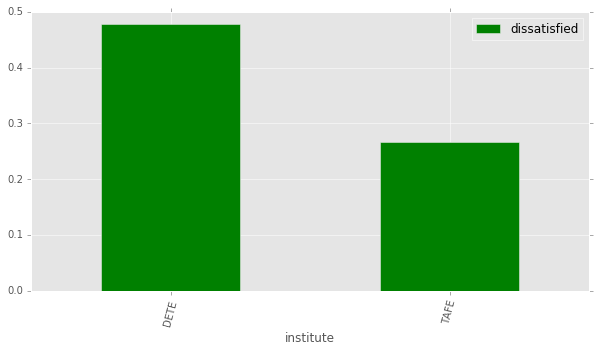

In [242]:

ptable_institute.plot(kind='bar',figsize=(10,5),rot=75,color='green')

From a glance at the chart above, it shows that higher number of employees in DETE institute resigned due to dissatisfaction of some kind. However, recall that the factors leading to resignation due to dissatisfaction in DETE were more than those considered for TAFE, and are as follows:

dete_resignations:

1. `job_dissatisfaction`
1. ` dissatisfaction_with_the_department`
1. `physical_work_environment`
1. `lack_of_recognition`
1. `lack_of_job_security`
1. `work_location`
1. `employment_conditions`
1. `work_life_balance`
1. `workload`

tafe_resignations:
1. `Contributing Factors. Dissatisfaction`
1. `Contributing Factors. Job Dissatisfaction`

Since there are more factors to dissatisfaction in DETE, the survey results in the above chart represents resignation due to dissatisfation employees in DETE institute.

#### 8.3 Employee dissatisfaction by age

Let's analyse and find out employees of what age resigned due to some kind of dissatisfaction. 

To proceed, let's first check the `age` column and it's values.


In [243]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We can notice that there are missing values and the data representation is inconsistent and we need to clean the data in the column. Let's extract the age values and to make it consistent, cast all to type `float` .

In [244]:
# extract age values and convert to float
combined_updated["age_updated"] = combined_updated["age"].astype('str').str.extract(r'(\d+)')
combined_updated["age_updated"] = combined_updated["age_updated"].astype('float')

# #verify the changes and unique values
combined_updated["age_updated"].value_counts(dropna=True)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_updated, dtype: int64

In [245]:
def update_age(age):
    if age >=60:
        return '60 and above'
    elif (age>=55)and(age<60):
        return '55-59'
    elif (age>=50)and(age<55):
        return '50-54'
    elif (age>=45)and(age<50):
        return '45-49'
    elif (age>=40)and(age<45):
        return '40-44'
    elif (age>=35)and(age<40):
        return '35-39'
    elif (age>=30)and(age<35):
        return '30-34'
    elif (age>=25)and(age<30):
        return '25-29'
    elif age<25:
        return '25 and less'
    
combined_updated['age_updated']= combined_updated['age_updated'].apply(update_age)
combined_updated['age_updated'].value_counts()


40-44           93
45-49           81
35-39           73
25 and less     72
50-54           71
25-29           67
30-34           61
55-59           55
60 and above    23
Name: age_updated, dtype: int64

In [246]:
# create pivot table - age by dissatisfaction

age_table = combined_updated.pivot_table(index='age_updated', values='dissatisfied')
age_table = age_table.sort_values(by='dissatisfied', ascending=False)
age_table

,dissatisfied
age_updated,
60 and above,0.521739
50-54,0.422535
25-29,0.417910
45-49,0.382716
55-59,0.381818
30-34,0.377049
40-44,0.376344
35-39,0.342466
25 and less,0.291667


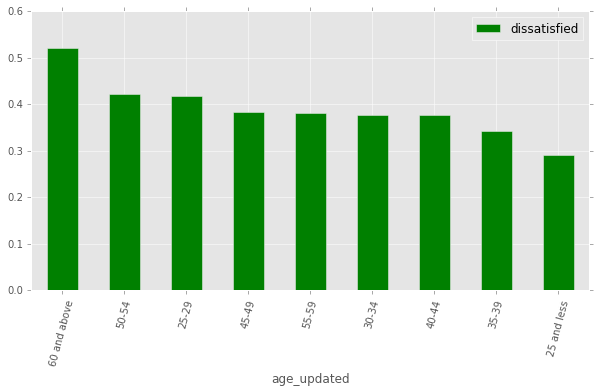

In [247]:
age_table.plot(kind='bar', figsize=(10,5), color='green', rot=75)

52% of employees aged above 60 years resigned due to dissatisfation of some kind, followed by 42% of the employees in the age group 50-54.


To analyse even further, let us find the dissatisfaction levels by gender and age group.

In [248]:
col =['gender','age_updated']
age_gender = combined_updated.pivot_table(index= col, values='dissatisfied')
age_gender = age_gender.sort_values(by='dissatisfied', ascending=False)
age_gender

dissatisfied
gender age_updated               
Male   60 and above      0.750000
       50-54             0.480000
       25-29             0.466667
       35-39             0.434783
Female 45-49             0.419355
       60 and above      0.416667
Male   40-44             0.416667
Female 25-29             0.403846
Male   55-59             0.400000
       30-34             0.400000
Female 30-34             0.377778
       50-54             0.377778
       55-59             0.371429
       40-44             0.362319
       25 and less       0.346154
       35-39             0.300000
Male   45-49             0.277778
       25 and less       0.150000

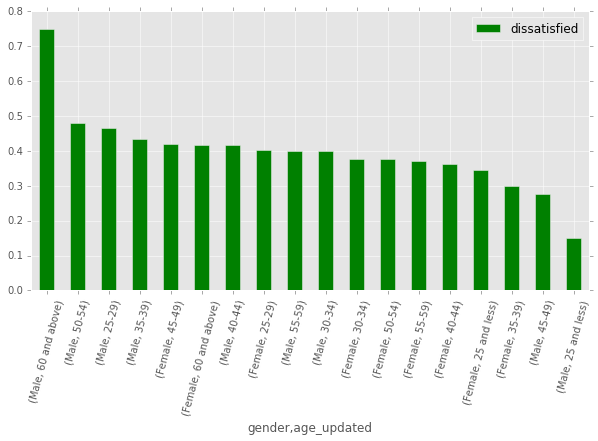

In [249]:

age_gender.plot(kind='bar', figsize=(10,5), color='green', rot=75)

Clearly, 75% of the male employees aged above 60 years resigned because of some kind of dissatisfaction at work, followed by 48% of male with the age group of 50-54.

In a broader view, Male employees aged above 35 except those in age range 55-59, resigned due to dissatisfaction when compared to their Female counterparts. 

In [250]:
age_cat = combined_updated.pivot_table(index=['service_cat','age_updated'], values='dissatisfied')
age_cat = age_cat.sort_values(by='dissatisfied', ascending=False)
age_cat

dissatisfied
service_cat age_updated               
Established 30-34             0.750000
            40-44             0.666667
Veteran     60 and above      0.642857
            50-54             0.600000
Established 25-29             0.545455
Veteran     45-49             0.545455
Established 50-54             0.500000
            60 and above      0.500000
Experienced 60 and above      0.500000
Veteran     40-44             0.500000
Experienced 25-29             0.444444
            40-44             0.413793
Established 35-39             0.400000
Veteran     30-34             0.400000
New         55-59             0.400000
Veteran     55-59             0.387097
Experienced 35-39             0.380952
New         45-49             0.368421
Established 45-49             0.363636
New         35-39             0.347826
Established 55-59             0.333333
New         25-29             0.320000
            50-54             0.318182
Experienced 30-34             0.300000
            25 and less       0.291667
            45-49             0.285714
Veteran     35-39             0.285714
New         25 and less       0.272727
Experienced 55-59             0.250000
New         30-34             0.250000
Experienced 50-54             0.250000
New         40-44             0.233333
Established 25 and less       0.000000

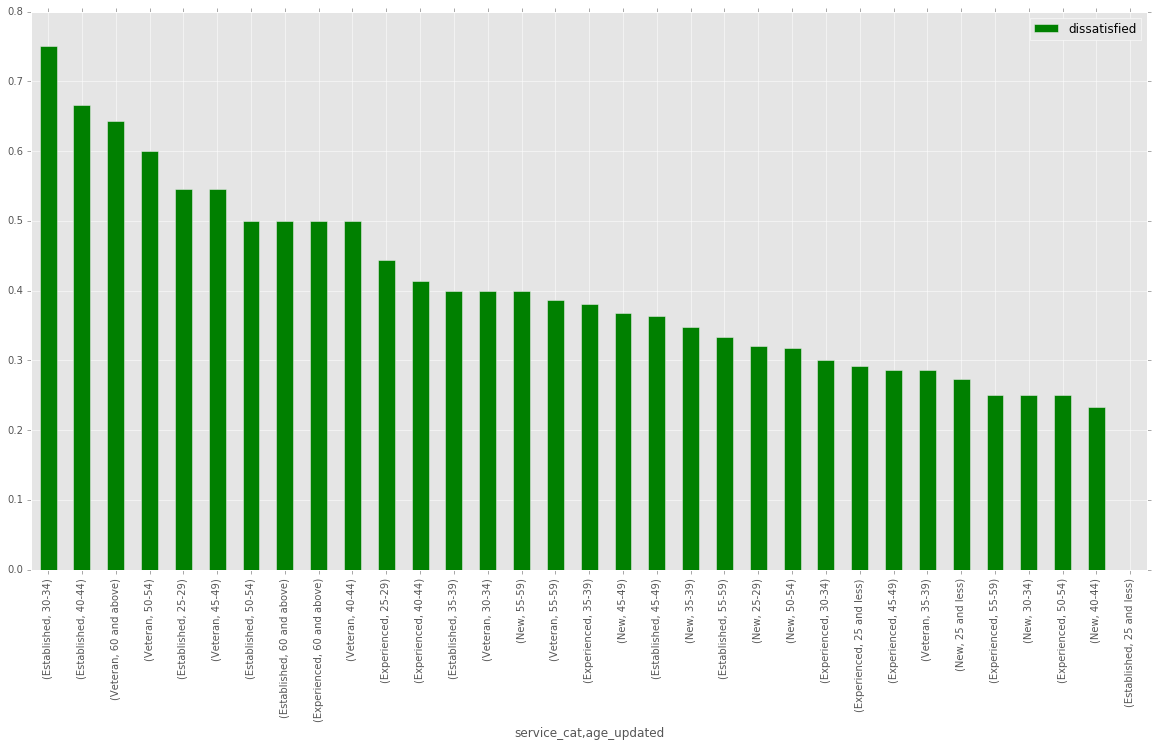

In [254]:
%matplotlib inline
age_cat.plot(kind='bar', figsize=(20,10), color='green') 


75% of the ***Established*** employees within the age group ***30-34***  with 7 to 10 years of experience, 64% of ***Veterans*** with 11 or more years of experience aged above 60,  reported more dissatisfation during their exit survery. Also, taking a closer look at the data shows that we can say that employees who have been employed at the institutes for more than 7 years were more likely to resign due to some kind of dissatisfaction.

However, establised employees who were less than 25 years of age reported zero dissatisfaction.


Let's further breakdown the analysis and plot each dissatisfaction factor in consideration against age

In [256]:
cols=[ 'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload','DETE-TAFE Combined job_dissatisfaction','Contributing Factors. Dissatisfaction']

dissatisfaction_age_result = combined_updated.pivot_table(index='age_updated', values=cols)

dissatisfaction_age_result = dissatisfaction_age_result.sort_index(ascending=False)
dissatisfaction_age_result

,Contributing Factors. Dissatisfaction,DETE-TAFE Combined job_dissatisfaction,dissatisfaction_with_the_department,employment_conditions,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
age_updated,,,,,,,,,,
60 and above,0.000000,0.260870,0.043478,0.086957,0.000000,0.043478,0.000000,0.130435,0.086957,0.130435
55-59,0.072727,0.072727,0.072727,0.018182,0.018182,0.072727,0.018182,0.127273,0.000000,0.090909
50-54,0.098592,0.239437,0.084507,0.028169,0.042254,0.056338,0.000000,0.140845,0.000000,0.056338
45-49,0.074074,0.148148,0.037037,0.037037,0.061728,0.049383,0.000000,0.111111,0.012346,0.037037
40-44,0.075269,0.129032,0.032258,0.043011,0.021505,0.053763,0.010753,0.129032,0.043011,0.021505
35-39,0.068493,0.136986,0.054795,0.041096,0.013699,0.027397,0.027397,0.109589,0.027397,0.054795
30-34,0.081967,0.180328,0.065574,0.032787,0.000000,0.032787,0.000000,0.131148,0.049180,0.016393
25-29,0.059701,0.194030,0.044776,0.074627,0.029851,0.089552,0.029851,0.074627,0.074627,0.059701
25 and less,0.069444,0.152778,0.013889,0.013889,0.000000,0.069444,0.000000,0.083333,0.013889,0.013889


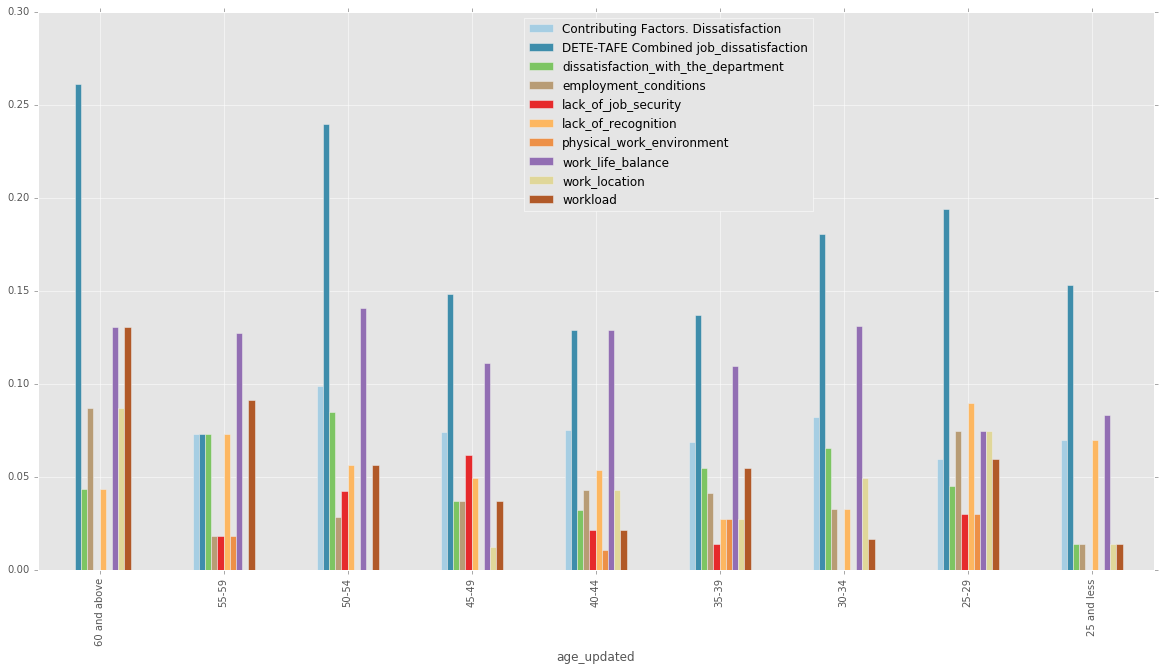

In [257]:
%matplotlib inline
dissatisfaction_age_result.plot(kind='bar',figsize=(20,10), colormap='Paired').legend(bbox_to_anchor=(0.7, 1))

We notice that 26% of the employees above 60 years of age felt dissatisfied at work.  If we take a closer look at the data, it can be noted that one of the highest reasons of dissatisfaction is dissatisfaction with the job across all the age groups, which backs our analysis earlier [here](#all_factors).

### Conclusion

In this project we analysed the exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia to figure out the the reason for resignation being dissatisfaction of some kind amoung the employees.

We can conclude that employees who have worked longer in the institutes were prone to resign due to some kind of dissatisfaction than those who worked for shorter periods of time. About 30% of the new employees and more than 50% of the established employees resigned due to some dissatisfaction.

It is also notable that employees who were older ie, above the age of 60 and those between 50 and 54 years of age citied more dissatisfacation. And 42% of the younger employees between 25-29 years resigned due to dissatisfaction. Our data also shows employees in the age group 30-34 and 40-44 also have experienced higher rates of dissatisfaction. Therefore, we cannot assert that the age is directly proportional to the dissatisfaction experienced by the employees.